<a href="https://colab.research.google.com/drive/1PdzmkAxgxmd7pyoCYoB3ar1S6VNO9-Eu" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.


# Taller #4


Para un conjunto de jugadores de la NBA, se desea evaluar si existe relación entre algunas variables asociadas a los jugadores. 

El dataset de la NBA ('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv') contiene información de los jugadores, como su nombre, equipo, posición, edad, altura (pies-pulgadas), peso (libras) y salario anual.


# Importación de librerías

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pregunta 1

Cargar e inspeccionar el dataset

In [19]:
nba = pd.read_csv('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv')
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,457.0,1.767834e+01,1.596609e+01,0.0,5.00,13.0,25.0,99.0
Age,457.0,2.693873e+01,4.404016e+00,19.0,24.00,26.0,30.0,40.0
Weight,457.0,2.215230e+02,2.636834e+01,161.0,200.00,220.0,240.0,307.0
Salary,446.0,4.842684e+06,5.229238e+06,30888.0,1044792.25,2839073.0,6500000.0,25000000.0


In [20]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [21]:
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


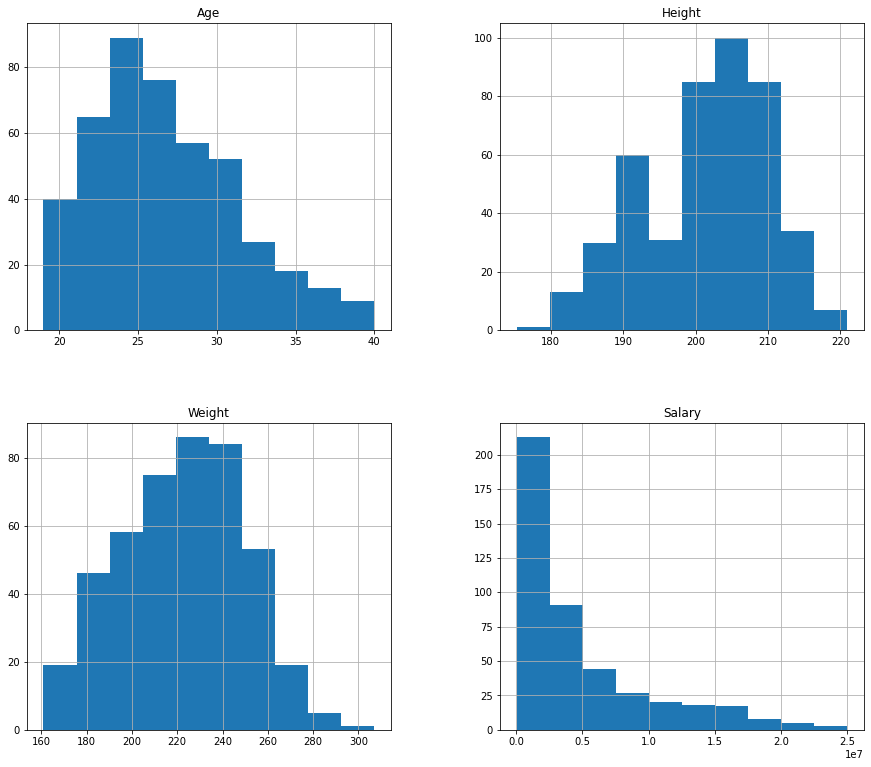

In [205]:
nba.hist(figsize=(15,13))
plt.show()

## Pregunta 2

Eliminar las filas que tengan el salario nulo y la columna number, ya que esta no tiene ninguna relevancia

In [22]:
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [23]:
nba.Number

0       0.0
1      99.0
2      30.0
3      28.0
4       8.0
       ... 
453     8.0
454    25.0
455    21.0
456    24.0
457     NaN
Name: Number, Length: 458, dtype: float64

In [24]:
del(nba['Number'])

In [25]:
nba.head()

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,231.0,NaN,5000000.0


# Valores nulos del dataset completo

In [26]:
valores_nulos = nba.isnull().sum()
valores_nulos

Name         1
Team         1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

# Eliminamos las filas que tengan como nulo al salario

In [27]:
nba.dropna(subset=["Salary"], axis=0, inplace=True)

# Reseteamos el índice

In [28]:
nba.reset_index(drop=True, inplace=True)

In [29]:
nba

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,235.0,Marquette,6796117.0
2,R.J. Hunter,Boston Celtics,SG,22.0,6-5,185.0,Georgia State,1148640.0
3,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,231.0,NaN,5000000.0
4,Amir Johnson,Boston Celtics,PF,29.0,6-9,240.0,NaN,12000000.0
...,...,...,...,...,...,...,...,...
441,Trey Lyles,Utah Jazz,PF,20.0,6-10,234.0,Kentucky,2239800.0
442,Shelvin Mack,Utah Jazz,PG,26.0,6-3,203.0,Butler,2433333.0
443,Raul Neto,Utah Jazz,PG,24.0,6-1,179.0,NaN,900000.0
444,Tibor Pleiss,Utah Jazz,C,26.0,7-3,256.0,NaN,2900000.0


## Pregunta 3

Convertir la estatura de pies-pulgadas a centímetros.

1 pie=30.48cm
1 pulgada=2.54

In [30]:
nba['Height'] = np.array([((float(value[0:1])*30.48)+(float(value[2:len(value)])*2.54)) for value in nba['Height']])

In [15]:
nba

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,187.96,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,198.12,235.0,Marquette,6796117.0
2,R.J. Hunter,Boston Celtics,SG,22.0,195.58,185.0,Georgia State,1148640.0
3,Jonas Jerebko,Boston Celtics,PF,29.0,208.28,231.0,NaN,5000000.0
4,Amir Johnson,Boston Celtics,PF,29.0,205.74,240.0,NaN,12000000.0
...,...,...,...,...,...,...,...,...
441,Trey Lyles,Utah Jazz,PF,20.0,208.28,234.0,Kentucky,2239800.0
442,Shelvin Mack,Utah Jazz,PG,26.0,190.50,203.0,Butler,2433333.0
443,Raul Neto,Utah Jazz,PG,24.0,185.42,179.0,NaN,900000.0
444,Tibor Pleiss,Utah Jazz,C,26.0,220.98,256.0,NaN,2900000.0


## Pregunta 4

Construir un histograma con las cinco universidades con mas jugadores en la NBA

[]

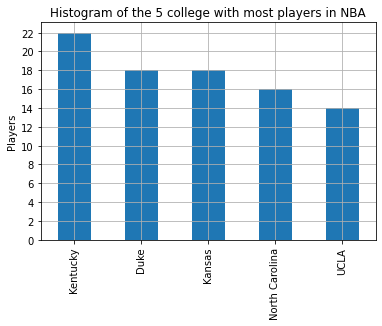

In [62]:
nba['College'].value_counts()[0:5].plot(kind='bar')
plt.yticks(np.arange(0,24,2))
plt.ylabel("Players")
plt.title("Histogram of the 5 college with most players in NBA")
plt.grid()
plt.plot()

## Pregunta 5

Obtener los cinco equipos que pagan los salarios mas altos (sumando toda la nómina de sus jugadores)

In [76]:
nba.groupby('Team')['Salary'].sum().sort_values(ascending=False)[0:5]

Team
Cleveland Cavaliers      106988689.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Golden State Warriors     88868997.0
Chicago Bulls             86783378.0
Name: Salary, dtype: float64

## Pregunta 6

Construir una tabla pivot que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Construir una representación visual de la información anterior usando heatmap. 

In [153]:
filtered_nba = nba[nba.Team.isin([item for item in nba.groupby('Team')['Salary'].sum().sort_values(ascending=False)[0:5].index])]

In [154]:
filtered_nba.pivot_table(index='Team', columns='Position', aggfunc={'Salary':'mean'})

Salary                                            \
Position                          C            PF            PG            SF   
Team                                                                            
Chicago Bulls          1.042438e+07  3.361007e+06  1.117153e+07  1.958160e+06   
Cleveland Cavaliers    6.828957e+06  1.394101e+07  6.551592e+06  1.195889e+07   
Golden State Warriors  6.541249e+06  7.275312e+06  8.457256e+06  3.766367e+06   
Los Angeles Clippers   1.039480e+07  6.655482e+06  8.509072e+06  3.662924e+06   
Oklahoma City Thunder  6.303143e+06  5.821013e+06  9.382869e+06  8.599621e+06   

                                     
Position                         SG  
Team                                 
Chicago Bulls          5.717549e+06  
Cleveland Cavaliers    3.761809e+06  
Golden State Warriors  6.316092e+06  
Los Angeles Clippers   4.639893e+06  
Oklahoma City Thunder  3.207058e+06

[]

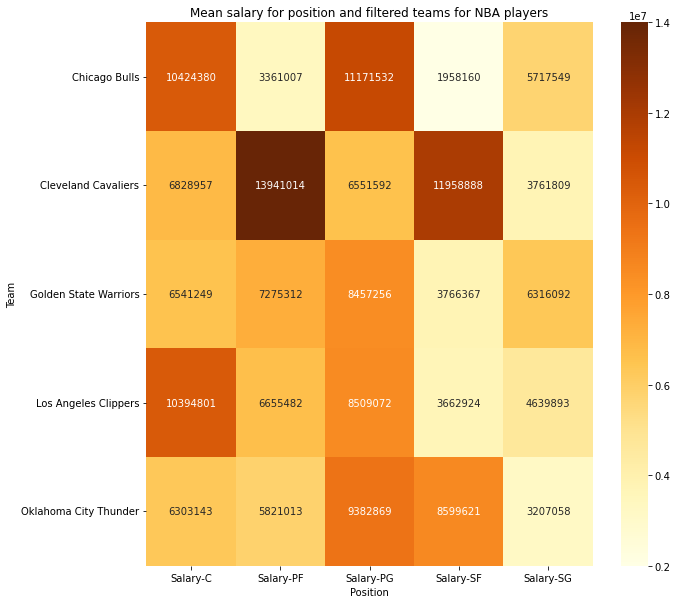

In [185]:
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(filtered_nba.pivot_table(index='Team', columns='Position', aggfunc={'Salary':'mean'}), 
        annot=True, fmt=".0f", cmap='YlOrBr', vmin=0.2e7 ,vmax=1.4e7)
ax.set(xlabel="Position", title='Mean salary for position and filtered teams for NBA players')
ax.plot()

## Pregunta 7

Utilizar el método `scatter_matrix` para visualizar si existe algún tipo de correlación entre las variables numéricas del dataset

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Height', ylabel='Age'>,
        <AxesSubplot:xlabel='Weight', ylabel='Age'>,
        <AxesSubplot:xlabel='Salary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Salary', ylabel='Height'>],
       [<AxesSubplot:xlabel='Age', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Salary', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Age', ylabel='Salary'>,
        <AxesSubplot:xlabel='Height', ylabel='Salary'>,
        <AxesSubplot:xlabel='Weight', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

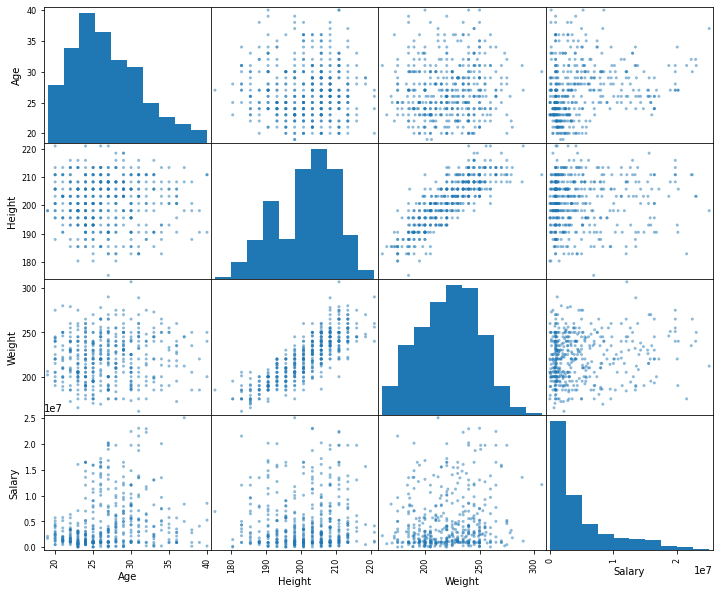

In [194]:
from pandas.plotting import scatter_matrix

#attributes = ["engine-size","curb-weight","horsepower","bore"]

scatter_matrix(nba, figsize=(12,10))

Se puede observar una especie de relación lineal entre las alturas y pesos de los jugadores de la NBA

## Pregunta 8

Corroborar los resultados anteriores calculando los coeficientes de correlación de Pearson para las variables numéricas del dataset


In [198]:
corr_p = nba.corr()
corr_p

,Age,Height,Weight,Salary
Age,1.000000,-0.015326,0.076597,0.213459
Height,-0.015326,1.000000,0.826604,0.058792
Weight,0.076597,0.826604,1.000000,0.138321
Salary,0.213459,0.058792,0.138321,1.000000


[]

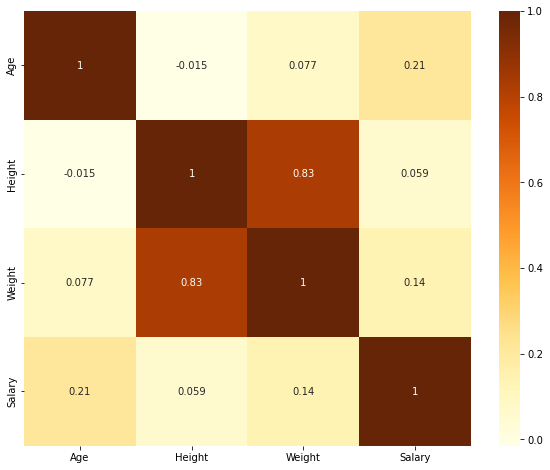

In [204]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_p,cmap='YlOrBr',annot=True)
ax.plot()

Podemos observar una alta correlación entre las alturas y pesos de los jugadores por el método de Pearson

## Pregunta 9

Usar el método `pairplot` para evaluar visualizar si existe dependencia entre algunas de las variables numéricas y la posición de los jugadores.

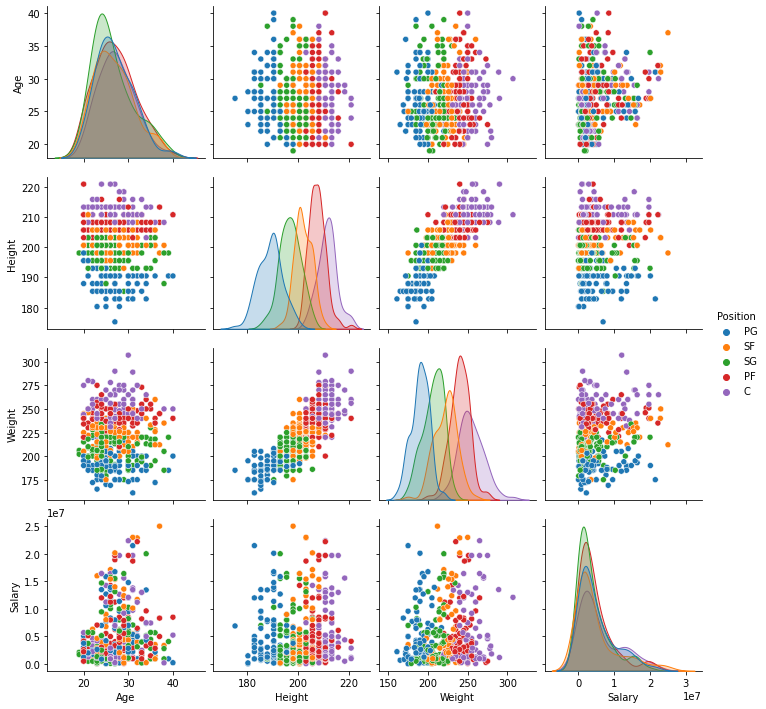

In [197]:
sns.pairplot(nba, hue = "Position")

La mayor dependecia la encontramos en las alturas y pesos de los jugadores respecto a su posición de juego en la cancha donde se puede observar una distinguibilidad entre los tipos de posiciones y una alta correlación entre las alturas y los pesos de los jugadores